# Problem Statement:
# A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
# Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data set 'Company_Data.csv'
df = pd.read_csv('Company_Data.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
df['Sales']

0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 400, dtype: float64

In [4]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
# Define the bin edges and labels for three categories
bin_edges = [0, 7.49, 9.32, 16.27]  # Adjusted bin edges
bin_labels = ['Low', 'Medium', 'High']

In [6]:
# Use pd.cut to convert 'Sales' into a categorical variable
df['Sales_Category'] = pd.cut(df['Sales'], bins=bin_edges, labels=bin_labels)

In [7]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Category
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [8]:
df['Sales_Category'].value_counts()

Low       200
Medium    100
High       99
Name: Sales_Category, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Sales           400 non-null    float64 
 1   CompPrice       400 non-null    int64   
 2   Income          400 non-null    int64   
 3   Advertising     400 non-null    int64   
 4   Population      400 non-null    int64   
 5   Price           400 non-null    int64   
 6   ShelveLoc       400 non-null    object  
 7   Age             400 non-null    int64   
 8   Education       400 non-null    int64   
 9   Urban           400 non-null    object  
 10  US              400 non-null    object  
 11  Sales_Category  399 non-null    category
dtypes: category(1), float64(1), int64(7), object(3)
memory usage: 35.0+ KB


In [10]:
df.isnull().sum()

Sales             0
CompPrice         0
Income            0
Advertising       0
Population        0
Price             0
ShelveLoc         0
Age               0
Education         0
Urban             0
US                0
Sales_Category    1
dtype: int64

In [11]:
# Filling the null values with mode i.e(low)
df = df.fillna("Low")
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Category
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,Low
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,Low
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,Low


In [12]:
df.isnull().sum()

Sales             0
CompPrice         0
Income            0
Advertising       0
Population        0
Price             0
ShelveLoc         0
Age               0
Education         0
Urban             0
US                0
Sales_Category    0
dtype: int64

# From the above , we can say that there are no null values

In [13]:
#One hot encoding usind pandas
df=pd.get_dummies(df,columns=['Urban','US'], drop_first=True)

In [14]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Sales_Category,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,Bad,42,17,High,1,1
1,11.22,111,48,16,260,83,Good,65,10,High,1,1
2,10.06,113,35,10,269,80,Medium,59,12,High,1,1
3,7.40,117,100,4,466,97,Medium,55,14,Low,1,1
4,4.15,141,64,3,340,128,Bad,38,13,Low,1,0


In [15]:
df['ShelveLoc']=df['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})

In [16]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Sales_Category,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,3,42,17,High,1,1
1,11.22,111,48,16,260,83,1,65,10,High,1,1
2,10.06,113,35,10,269,80,2,59,12,High,1,1
3,7.40,117,100,4,466,97,2,55,14,Low,1,1
4,4.15,141,64,3,340,128,3,38,13,Low,1,0


In [17]:
df.drop('Sales',axis = 1,inplace = True)

In [18]:
# seperate the target variable form the other features of the data set
x = df.drop('Sales_Category',axis = 1)
y = df['Sales_Category']

In [19]:
# import required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

In [20]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

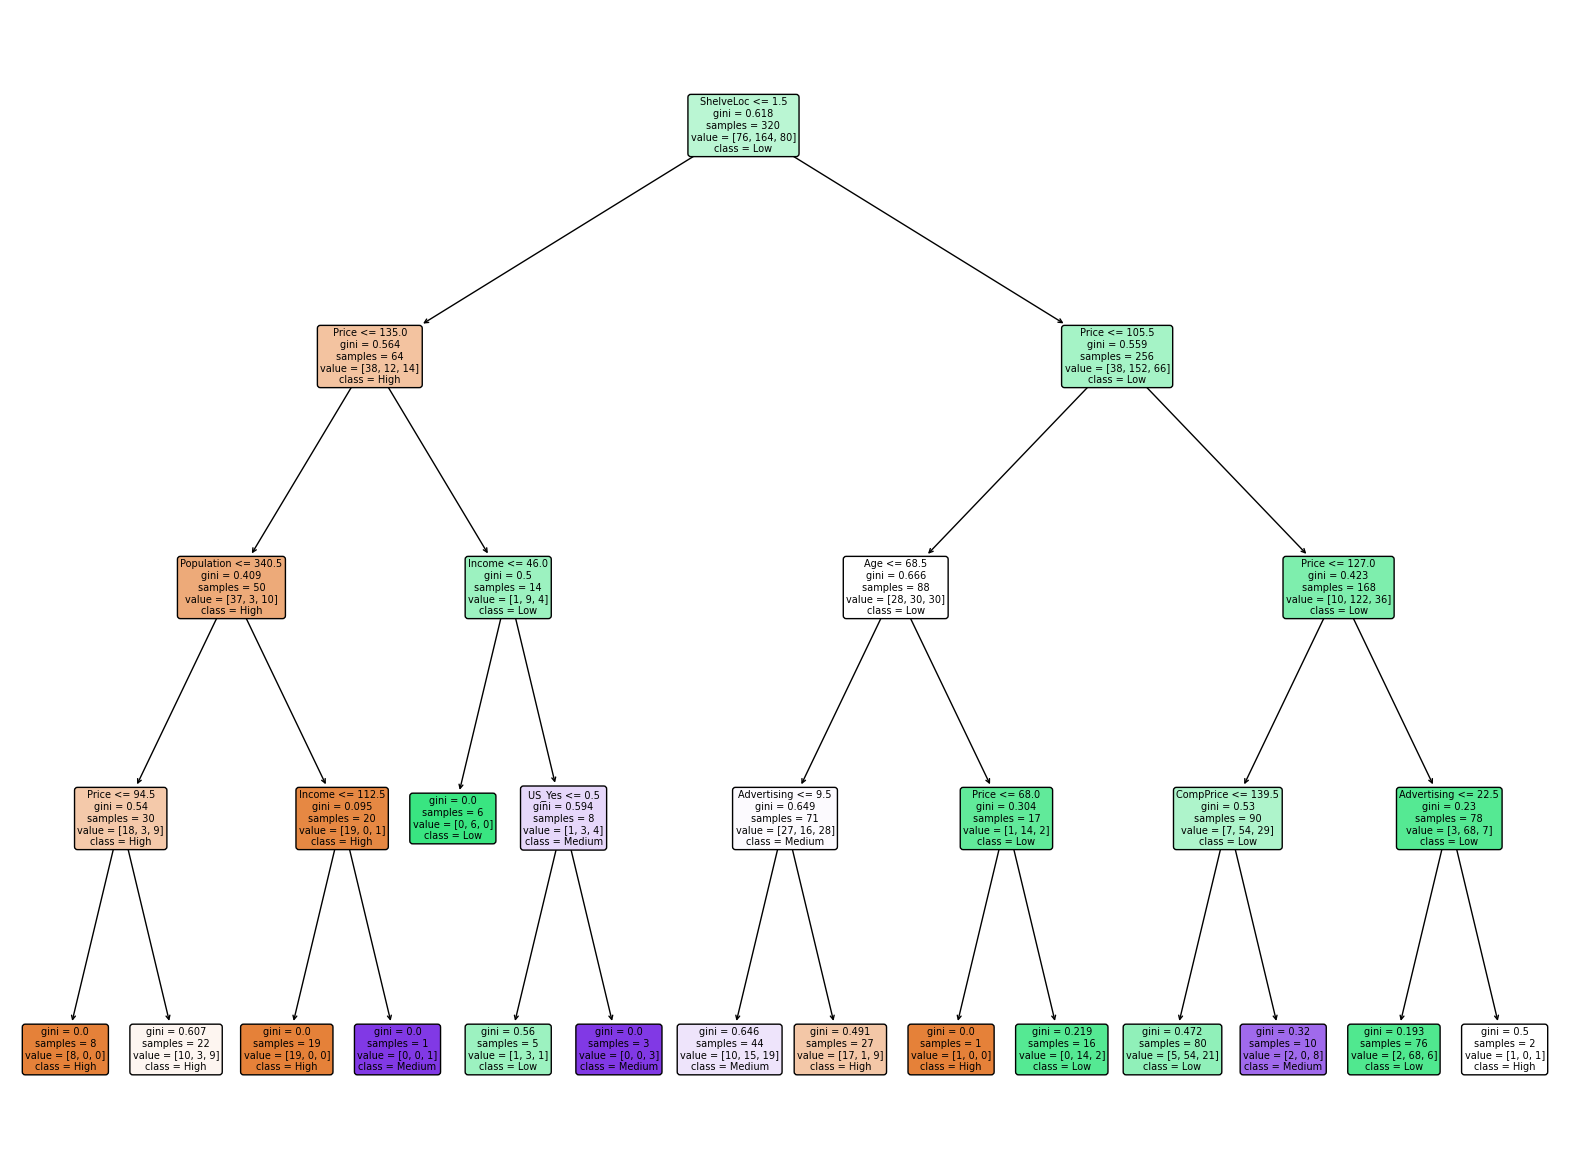

In [22]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15))
plot_tree(dt,feature_names = x.columns.tolist(),class_names=y.unique().tolist(), filled=True, rounded=True);

In [23]:
# predict on the train data & test data
pred_train = dt.predict(x_train)
pred_test = dt.predict(x_test)

In [24]:
pred_train[:5]

array(['Medium', 'High', 'Low', 'Medium', 'Low'], dtype=object)

In [25]:
pred_test[:5]

array(['Low', 'Low', 'High', 'Low', 'Medium'], dtype=object)

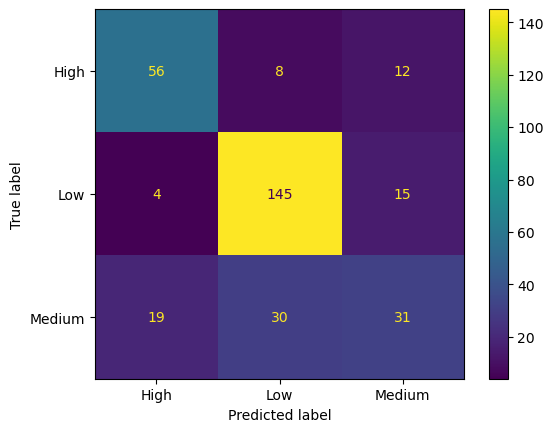

In [26]:
# plot confusion matrix for train data
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
ConfusionMatrixDisplay.from_estimator(dt,x_train,y_train,cmap='viridis');

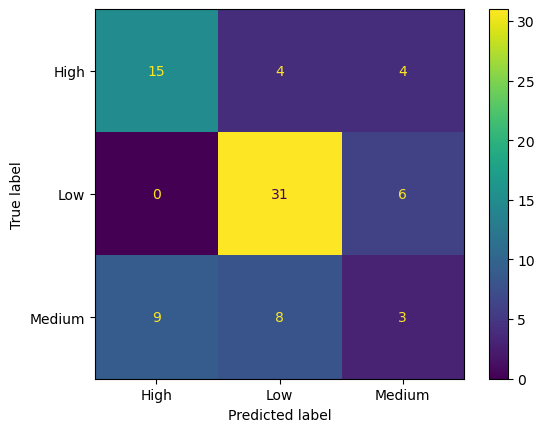

In [27]:
# plot confusion matrix for test data
ConfusionMatrixDisplay.from_estimator(dt,x_test,y_test,cmap = 'viridis');

In [28]:
# # calculate accuracy score for train data
acc_score = dt.score(x_train,y_train)

In [29]:
acc_score

0.725

In [30]:
# calculate accuaracy score for test data
acc_score_test = dt.score(x_test,y_test)

In [31]:
acc_score_test

0.6125

In [32]:
# Visualising the feature importance
feature_importance = dt.feature_importances_
feature_names = x.columns
sorted_idx = feature_importance.argsort()[::-1]

In [33]:
for i in sorted_idx:
    print(f"{feature_names[i]}: {feature_importance[i]}")

Price: 0.3995647708892933
ShelveLoc: 0.23348225302946835
Age: 0.09217914976854687
CompPrice: 0.08481426625790738
Advertising: 0.08447463717388945
Income: 0.05186758648764374
Population: 0.02924581985086417
US_Yes: 0.02437151654238682
Urban_Yes: 0.0
Education: 0.0


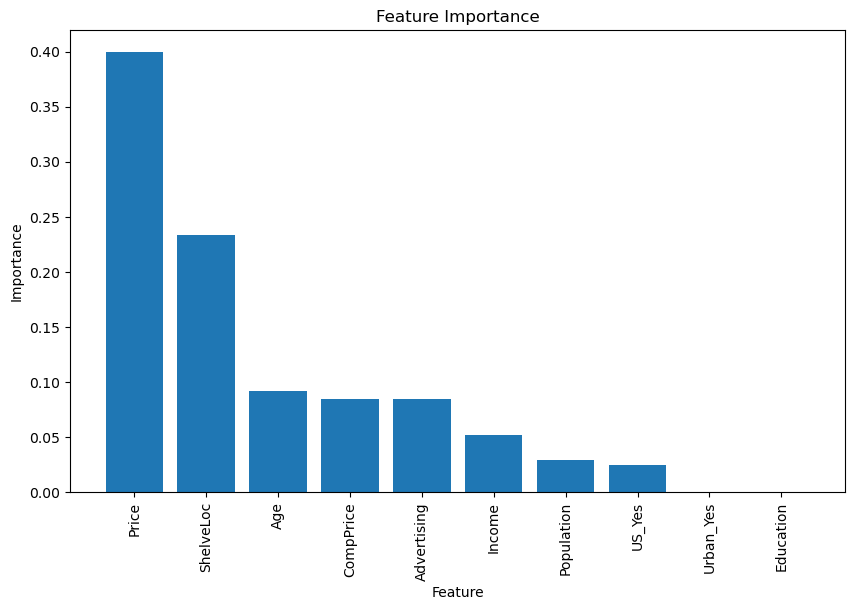

In [34]:
plt.figure(figsize=(10, 6))
plt.bar(range(x.shape[1]), feature_importance[sorted_idx], align="center")
plt.xticks(range(x.shape[1]), [feature_names[i] for i in sorted_idx], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()

# From the above Decision tree and Feature importance plot, we can say that Price and Shelveloc are the two main attributes for causing high sales

In [36]:
# Hyperparameter tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [106]:
dt_best = DecisionTreeClassifier(max_depth=10,criterion='gini',min_samples_leaf=5)
dt_best.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5)

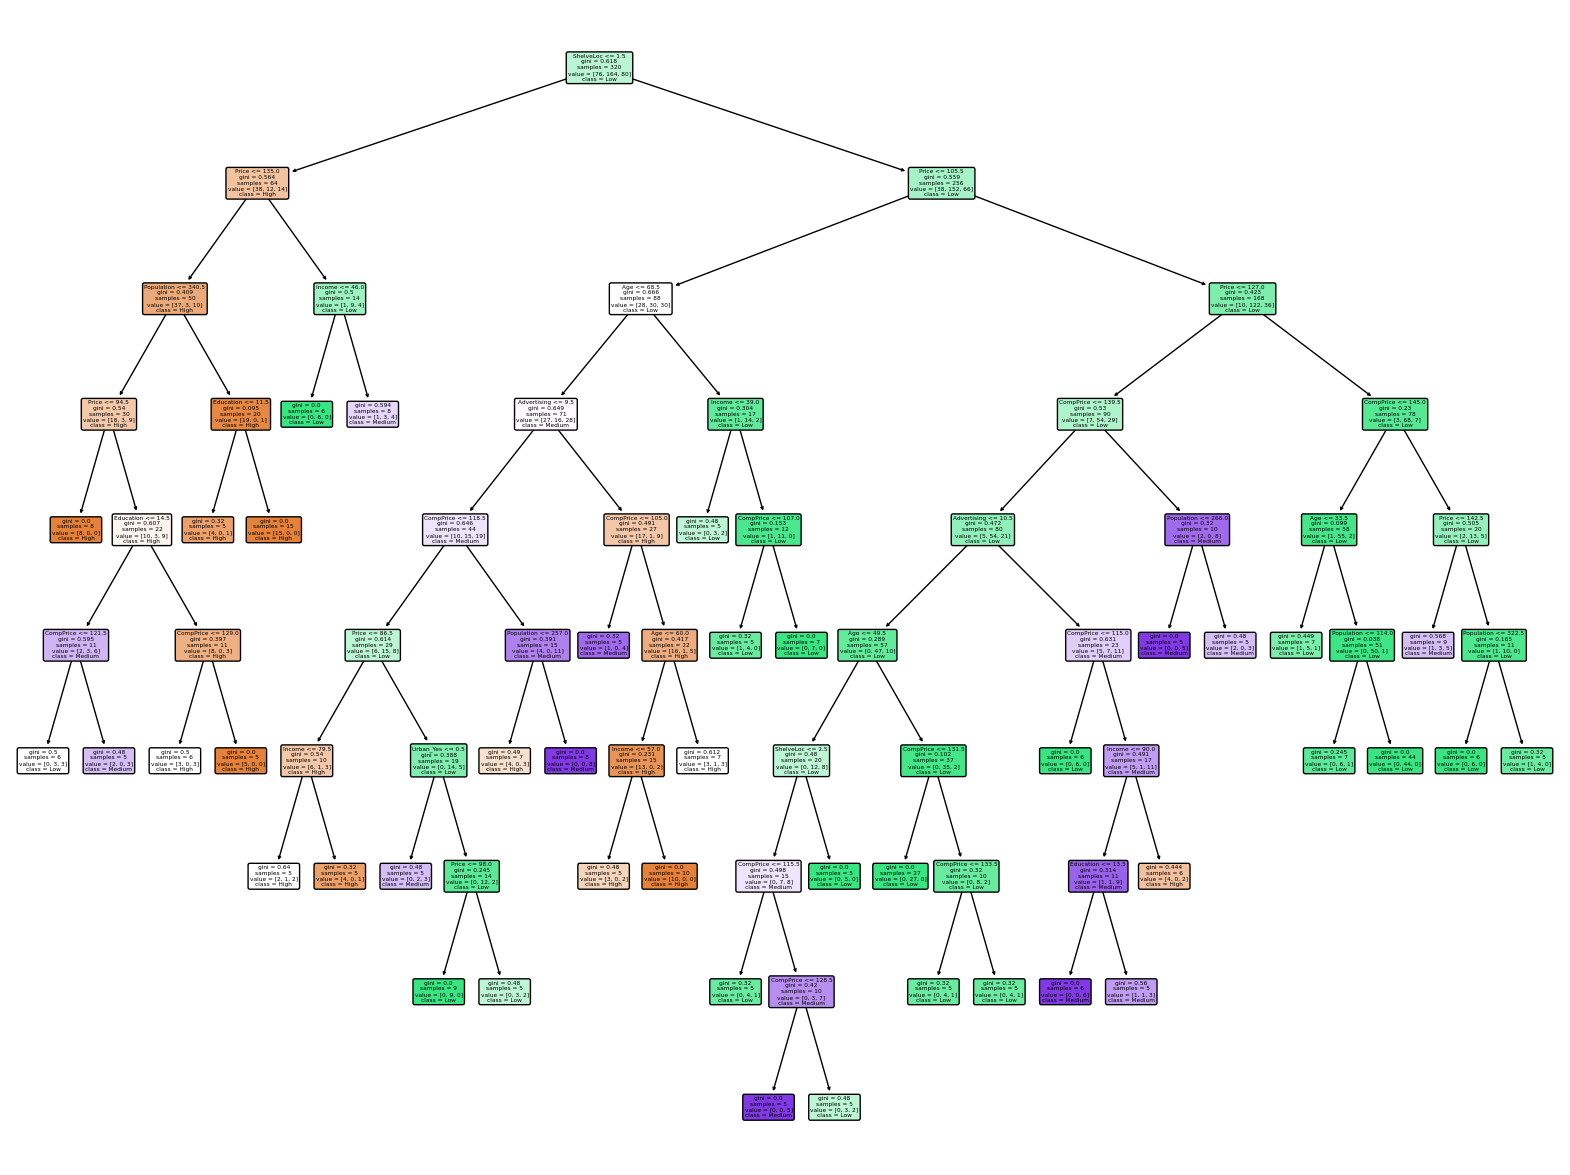

In [107]:
plt.figure(figsize=(20,15))
plot_tree(dt_best,feature_names = x.columns.tolist(),class_names=y.unique().tolist(), filled=True, rounded=True);

In [108]:
pred_train_best = dt_best.predict(x_train)

In [109]:
pred_train_best[:5]

array(['Low', 'High', 'Low', 'Medium', 'Low'], dtype=object)

In [110]:
pred_test_best = dt_best.predict(x_test)

In [111]:
pred_test_best[:5]

array(['Low', 'Low', 'High', 'Low', 'High'], dtype=object)

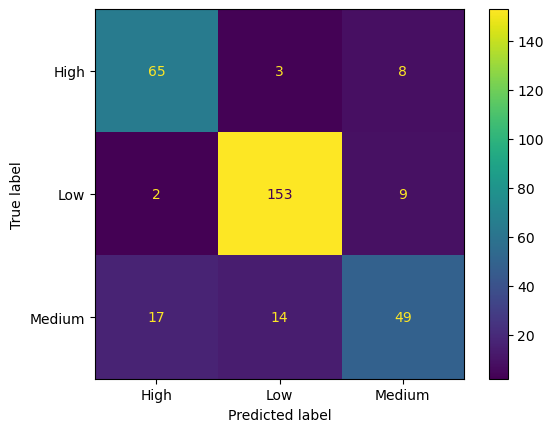

In [112]:
# Confusion matrix dispaly on train data
ConfusionMatrixDisplay.from_estimator(dt_best,x_train,y_train,cmap = 'viridis');

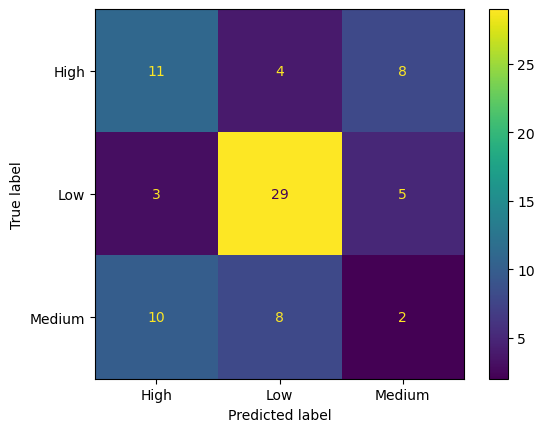

In [113]:
# Confusion matrix dispaly on test data
ConfusionMatrixDisplay.from_estimator(dt_best,x_test,y_test,cmap = 'viridis');

In [114]:
# # calculate accuracy score for train data
acc_score_best_train = dt_best.score(x_train,y_train)

In [115]:
acc_score_best_train

0.834375

In [116]:
acc_score_best_test = dt_best.score(x_test,y_test)
acc_score_best_test

0.525

In [129]:
# Decision tree for imbalanced classes
dt_imb = DecisionTreeClassifier(class_weight='balanced')

In [130]:
dt_imb.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced')

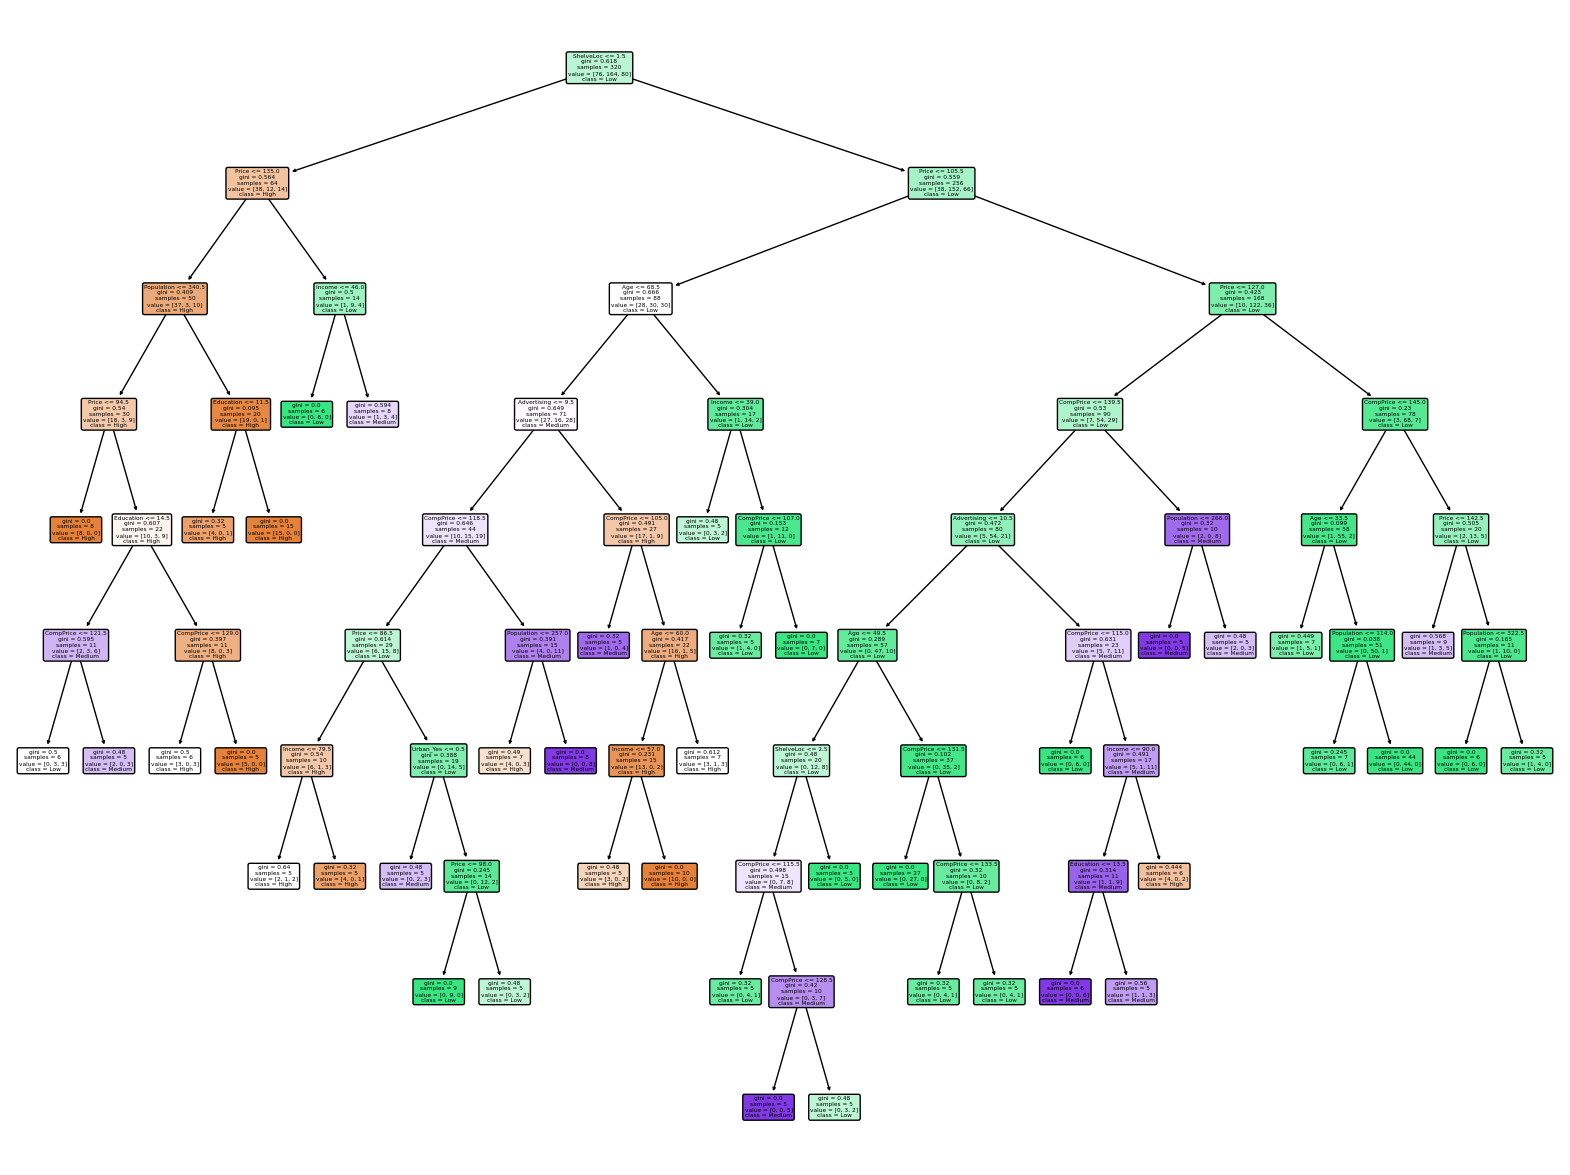

In [131]:
plt.figure(figsize=(20,15))
plot_tree(dt_best,feature_names = x.columns.tolist(),class_names=y.unique().tolist(), filled=True, rounded=True);

In [133]:
pred_train_imb = dt_imb.predict(x_train)
pred_train_imb[:5]

array(['Low', 'High', 'Low', 'Medium', 'Low'], dtype=object)

In [134]:
pred_test_imb = dt_imb.predict(x_test)
pred_test_imb[:5]

array(['High', 'Low', 'High', 'Medium', 'Low'], dtype=object)

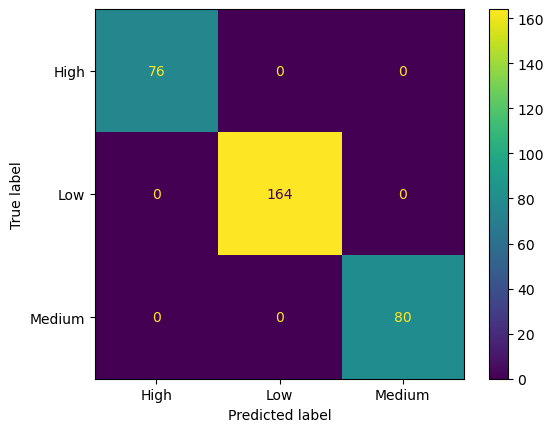

In [135]:
# Confusion matrix dispaly on train data
ConfusionMatrixDisplay.from_estimator(dt_imb,x_train,y_train,cmap = 'viridis');

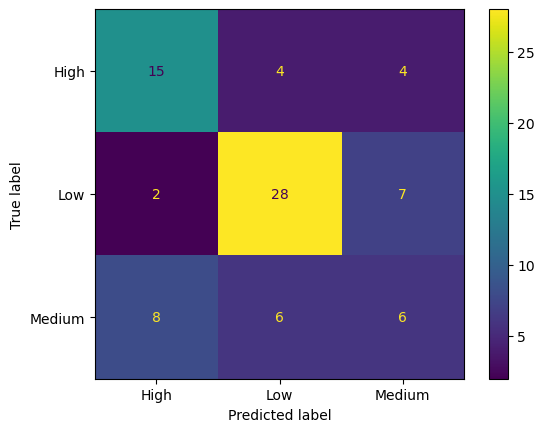

In [136]:
# Confusion matrix dispaly on test data
ConfusionMatrixDisplay.from_estimator(dt_imb,x_test,y_test,cmap = 'viridis');

In [137]:
# Evaluate the model
accuracy = accuracy_score(y_test, pred_test_imb)
print("Accuracy:", accuracy)

Accuracy: 0.6125


In [138]:
# Evaluate the model
accuracy = accuracy_score(y_train, pred_train_imb)
print("Accuracy:", accuracy)

Accuracy: 1.0


# The model is giving 100% accuarcy on train data set, while it is not giving the best result on test data set.The model is over fitting

In [139]:
# Visualising the feature importance
feature_importance = dt_imb.feature_importances_
feature_names = x.columns
sorted_idx = feature_importance.argsort()[::-1]

In [140]:
for i in sorted_idx:
    print(f"{feature_names[i]}: {feature_importance[i]}")

Price: 0.26222568697921483
CompPrice: 0.16745684154128868
Income: 0.11074416431436898
Age: 0.1036541216723926
Advertising: 0.09934222683460331
ShelveLoc: 0.09798138105012656
Population: 0.08097676851119517
Education: 0.06789715138707463
Urban_Yes: 0.009721657709735241
US_Yes: 0.0


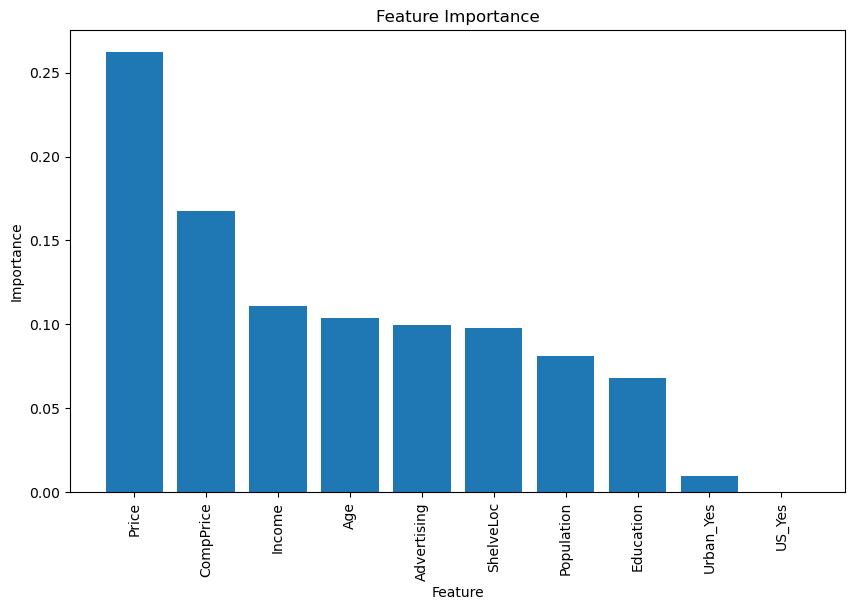

In [141]:
plt.figure(figsize=(10, 6))
plt.bar(range(x.shape[1]), feature_importance[sorted_idx], align="center")
plt.xticks(range(x.shape[1]), [feature_names[i] for i in sorted_idx], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()

# From this model , we can say that price and compprice are the main factors for high sales

# From the models above , We can say that the Price is the main attribute which causing the High sales